In [90]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
buildloc = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\build\Debug'
sys.path.append(buildloc)
import GaussFits

0

In [2]:
params = np.array([5,5,5,2,1,1, 10, 10, 10, 15, 15, 5])
model = np.zeros([20,20])

In [3]:
model = GaussFits.modelThree2DGaussian(params, model)
noisy = np.random.poisson(model)

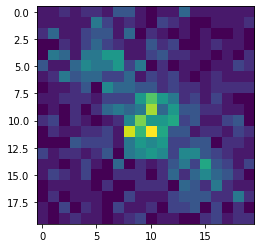

In [4]:
plt.imshow(noisy)

In [6]:
params0 = np.array([4, #x0
                    5,#y0
                    5, #A0
                    2, #sigma
                    1,#eps
                    1, #bg
                    10, # x1
                    10, #y1
                    10, #A1
                    15, #x2
                    15, #y2
                    5, #A2
                    0, #info
                    0, #wi_nowi
                    0, #fitbg
                    1, #ellipt_circ
                    2, #model
                    0]) # two Istar

params = GaussFits.Fit2DGauss(params0, noisy)

In [7]:
params

array([ 4.49835161,  5.32009408,  5.43811657,  1.98140734,  1.        ,
        1.18903861, 10.16070313,  9.90210672, 10.51559159, 14.7876337 ,
       14.64483162,  4.39278765,  4.        ,  0.        ,  0.        ,
        1.        ,  2.        ,  0.76514921])

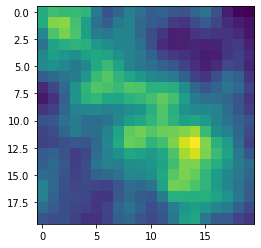

In [280]:
reconstructedmodel = GaussFits.modelThree2DGaussian(params[:12], np.zeros([20,20]))
data = gaussian_filter(noisy.astype(np.double), 1)
plt.imshow(data)

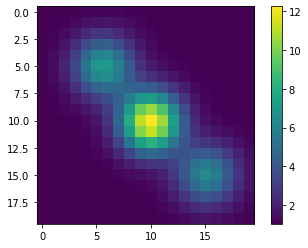

In [10]:
plt.imshow(reconstructedmodel)
plt.colorbar()

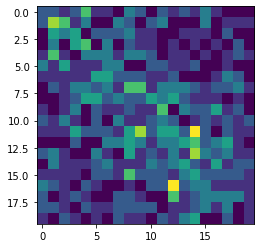

1 gauss 1.00 	 2 gauss 1.00 	 3 gauss 1.00
1 gauss 0.93 	 2 gauss nan 	 3 gauss nan
1 gauss 0.95 	 2 gauss 1.00 	 3 gauss 0.99
1 gauss nan 	 2 gauss nan 	 3 gauss 1.00
1 gauss 0.90 	 2 gauss nan 	 3 gauss 0.99
1 gauss 1.00 	 2 gauss 0.99 	 3 gauss 1.00
1 gauss 0.99 	 2 gauss 1.00 	 3 gauss 1.00
1 gauss 0.90 	 2 gauss nan 	 3 gauss 0.80
1 gauss 0.99 	 2 gauss 1.00 	 3 gauss 0.99
1 gauss 0.90 	 2 gauss nan 	 3 gauss nan
1 gauss 0.90 	 2 gauss 0.85 	 3 gauss 1.00
1 gauss 1.00 	 2 gauss 1.00 	 3 gauss 1.00
1 gauss 1.00 	 2 gauss 1.00 	 3 gauss 0.99
1 gauss 1.00 	 2 gauss 0.99 	 3 gauss 1.00
1 gauss 0.90 	 2 gauss 0.88 	 3 gauss 1.00
1 gauss 1.00 	 2 gauss 0.99 	 3 gauss 1.00
1 gauss 0.90 	 2 gauss 0.85 	 3 gauss 1.00
1 gauss 0.99 	 2 gauss 0.99 	 3 gauss nan
1 gauss 1.00 	 2 gauss 1.00 	 3 gauss 0.99
1 gauss 0.90 	 2 gauss 0.88 	 3 gauss nan


In [279]:
#params = np.array([5,5,5,2,1,1, 10, 10, 10, 15, 15, 5])
model = np.zeros([20,20])
params0 = np.array([4, #x0
                    5,#y0
                    2, #A0
                    3, #sigma
                    1,#eps
                    1, #bg
                    10, # x1
                    10, #y1
                    2, #A1
                    15, #x2
                    15, #y2
                    2, #A2
                    0, #info
                    0, #wi_nowi
                    0, #fitbg
                    1, #ellipt_circ
                    1, #model
                    0]) # two Istar
model = GaussFits.modelThree2DGaussian(params0, model)
noisy = np.random.poisson(model)
plt.imshow(noisy)
plt.show()
for i in range(20):
    params0 = [20, 20, 10, 5, 1, 2, 20, 20, 10, 20, 20, 10, 0, 0, 0, 0, 0, 0]*np.random.random(18) + \
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
    params0[16] = 0
    params_model0 = GaussFits.Fit2DGauss(params0, noisy)
    params0[16] = 1
    params_model1 = GaussFits.Fit2DGauss(params0, noisy)
    params0[16] = 2
    params_model2 = GaussFits.Fit2DGauss(params0, noisy)
    #plt.imshow(GaussFits.modelThree2DGaussian(params_model1[:12], np.zeros([20,20])))
    #plt.colorbar()
    #plt.show()
    print('1 gauss %.2f \t 2 gauss %.2f \t 3 gauss %.2f' %(params_model0[17], params_model1[17], params_model2[17]))
    #print('lm messsage: %.0f'  % params_model1[12])

In [9]:
def findPeaks(data):
    """finds all local peaks according to 'raindrop' model.
    All pixel get a raindrop. The rain flows uphill in neighbouring pixels
    Priority is given to x-direction
    input: A double gaussian-smoothed input image
    returns: a list of where the raindrops have converged"""
    xlen = data.shape[0]
    ylen = data.shape[1]
    points = np.zeros([xlen*ylen, 2], dtype = np.int)
    for x in range(xlen):
        for y in range(ylen):
            points[x*ylen + y, 0] = x
            points[x*ylen + y, 1] = y
    points_copy = points.copy()
    padded_data = np.pad(data, 1, mode = 'constant')
    eps_step = 1
    while(eps_step != 0):
        for index, point in enumerate(points):
            x,y = point
            xneighbours = padded_data[x: x + 3, y + 1]
            movex = xneighbours.argmax()
            if movex == 0: #move point left
                points_copy[index, 0] -= 1
                continue
            elif movex == 2: # move point right
                points_copy[index, 0] += 1
                continue
            yneighbours = padded_data[ x + 1, y: y + 3]
            movey = yneighbours.argmax()
            if movey == 0: #move up
                points_copy[index, 1] -= 1
            if movey == 2: #move down
                points_copy[index, 1] += 1
        eps_step = np.linalg.norm(points-points_copy)
        points = points_copy.copy()
        #print(eps_step)
    return points

In [3]:
def findUniquePoints(image, points):
    """
    DEPRICATED
    selects unique entries in numpy array points.
    returns an array of unique points and their corresponding smoothed image
    intensity. The array is sorted with highed intensity on top"""
    point_list = list(points)
    peaks = []
    while (len(point_list) > 0):
        xpoint, ypoint = point_list.pop(0) #pop new unique value
        #add unique value + image intensity to list
        peaks.append(np.array([xpoint, ypoint, image[xpoint, ypoint]]))
        #check remaining pointlist for duplicates
        i = 0
        while i < len(point_list):
            #if duplicate: pop
            if (point_list[i][0] == xpoint and point_list[i][1] == ypoint):
                point_list.pop(i)
            #else inspect next element
            else: i+=1
        #print(len(point_list))
    peak_arr = np.array(peaks)
    peak_arr = peak_arr[peak_arr[:,2].argsort(-1)][-1::-1]
    return peak_arr

In [53]:
def sortPeaks(peaks, xlen, ylen, mindiff = 2):
    """finds the most likely real starting locations of peaks
    First the brightest is taken. Then the second brightest is taken
    that is at least mindiff euclidian norm from the first point. etc.
    peaks: sorted array of peaks according to intensity
    xlen: xshape of image data
    ylen: yshape of image data
    mindiff: minimal euclidian norm from between peaks.
    returns: 3 peaks"""
    if mindiff == 0:
        print('must set mindiff >0, setting mindigg = 0.1')
        mindiff = 0.1
    i = 0
    goodpeak_cntr = 0
    goodpeaks = np.ones([3,2]) * -10
    #first peak is always the highest
    goodpeaks[0] = peaks[0]
    goodpeak_cntr += 1
    i += 1
    while i < peaks.shape[0]:
        #check if next peak is closer than any know peak
        if (np.linalg.norm(goodpeaks - peaks[i,0:2], axis = 1) < mindiff).any():
            i+=1
        #else another goodpeak is found
        else:
            goodpeaks[goodpeak_cntr] = peaks[i,0:2]
            i+= 1
            goodpeak_cntr += 1
        #stop after 3 peaks
        if goodpeak_cntr >= 3:
            break
    #if for some reason not enough peaks are found, supplement
    while goodpeak_cntr < 3:
        print ('not enough peaks found, try decreasing mindiff \n setting remaining peaks at random')
        goodpeaks[goodpeak_cntr] = np.random.random(2) * [xlen, ylen]
        goodpeak_cntr += 1
    return goodpeaks.astype(np.int)

In [26]:
from scipy.ndimage import gaussian_filter

In [120]:
xlen = 20
ylen = 20
model = np.zeros([xlen,ylen])
nruns = 100
twoistar_correctparams0 = np.zeros(nruns)
twoistar_estparams0 = np.zeros(nruns)
for i in range(nruns):
    params0 = np.array([5, #x0
                        5,#y0
                        10, #A0
                        3, #sigma
                        1,#eps
                        1, #bg
                        10, # x1
                        10, #y1
                        10, #A1
                        15, #x2
                        15, #y2
                        10, #A2
                        0, #info
                        0, #wi_nowi
                        0, #fitbg
                        1, #ellipt_circ
                        1, #model
                        0]) # two Istar
    model = GaussFits.modelThree2DGaussian(params0, model)
    noisy = np.random.poisson(model)
    smooth_image = gaussian_filter(noisy.astype(np.double), 1)
    peaks = findPeaks(smooth_image)
    uniquepeaks = findUniquePoints(smooth_image, peaks)
    best_peaks = sortPeaks(uniquepeaks[:,:2], xlen, ylen, mindiff = 2)
    plt.imshow(smooth_image)
    params_est = np.array([best_peaks[0,0], #x0
                        best_peaks[0,1],#y0
                        smooth_image[best_peaks[0,0], best_peaks[0,1]], #A0
                        4, #sigma
                        1,#eps
                        1, #bg
                        best_peaks[1,0], # x1
                        best_peaks[1,1], #y1
                        smooth_image[best_peaks[1,0], best_peaks[1,1]], #A1
                        best_peaks[2,0], #x2
                        best_peaks[2,1], #y2
                        smooth_image[best_peaks[2,0], best_peaks[2,1]], #A2
                        0, #info
                        0, #wi_nowi
                        0, #fitbg
                        1, #ellipt_circ
                        1, #model
                        0]) # two Istar
    params_rand = [20, 20, 10, 5, 1, 2, 20, 20, 10, 20, 20, 10, 0, 0, 0, 0, 0, 0]*np.random.random(18) + \
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
    test0 = GaussFits.Fit2DGauss(params0, noisy)
    test1 = GaussFits.Fit2DGauss(params_est, noisy)
    test_rand = GaussFits.Fit2DGauss(params_rand, noisy)
    twoistar_correctparams0[i] = test0[17]
    twoistar_estparams0[i] = test1[17]
    #print('estimated starting variables: %f \t random starting variables %f' 
    #      %(test0[17] - test1[17], test_rand[17] - test0[17]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


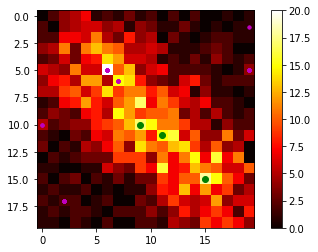

In [131]:
savedir = r'K:\vanderVoortN\reports\BenchmarkingPrecision\20200110MultipleSpotFitting'
plt.imshow(noisy, cmap = 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'm.')
plt.plot(best_peaks[:,1], best_peaks[:,0], 'go')
plt.colorbar()
plt.savefig(os.path.join(savedir,'Linear image (typ).png'), dpi = 300, bbox_inches = 'tight')

In [121]:
Linear_diff=twoistar_estparams0 - twoistar_correctparams0
Linear_best = twoistar_correctparams0
#Triangle_diff=twoistar_estparams0 - twoistar_correctparams0
#Triangle_best = twoistar_correctparams0

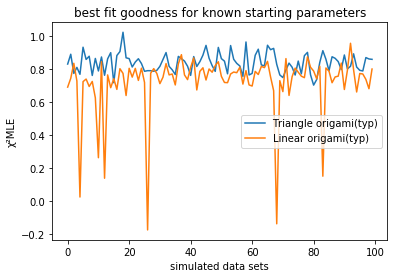

In [129]:
plt.plot(Triangle_best, label = 'Triangle origami(typ)')
plt.plot(Linear_best, label = 'Linear origami(typ)')
plt.ylabel('\u03C7\u00B2MLE')
plt.xlabel('simulated data sets')
plt.title('best fit goodness for known starting parameters')
plt.legend()
plt.savefig(os.path.join(savedir,'best fit goodness.png'), dpi = 300, bbox_inches = 'tight')

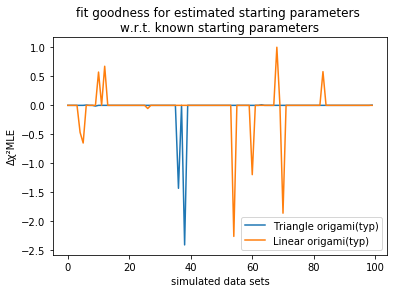

In [130]:

plt.plot(Triangle_diff, label = 'Triangle origami(typ)')
plt.plot(Linear_diff, label = 'Linear origami(typ)')
plt.ylabel('\u0394\u03C7\u00B2MLE')
plt.xlabel('simulated data sets')
plt.title('fit goodness for estimated starting parameters \nw.r.t. known starting parameters')
plt.legend()
plt.savefig(os.path.join(savedir,'relative fit goodness.png'), dpi = 300, bbox_inches = 'tight')